# **IRIS Flower Classification**

In [46]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [5]:
# Import the required dataset
df_iris = pd.read_csv(r'D:\Intellipaat\Datasets\IRIS.csv')
df_iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Exploratory Data Analysis

In [ ]:
# Data information
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# Count of null values for each column
df_iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
# Check for the duplicate reocrds 
df_iris.duplicated().sum()

0

In [ ]:
# Drop the unwanted columns
df_iris.drop(columns=['Id'], inplace=True)
df_iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


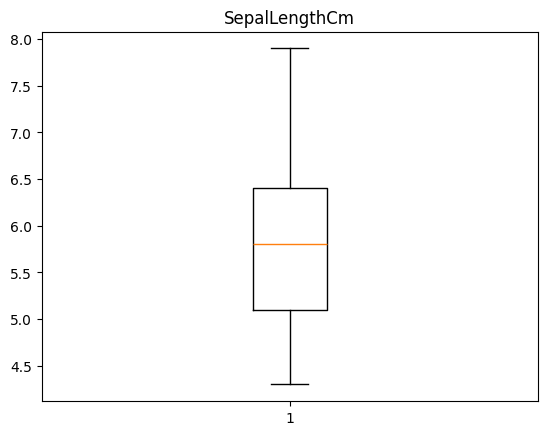

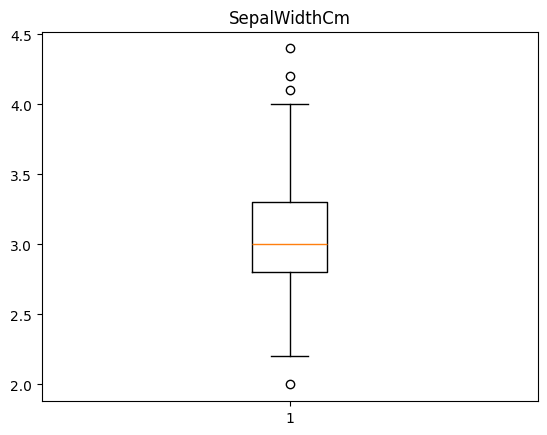

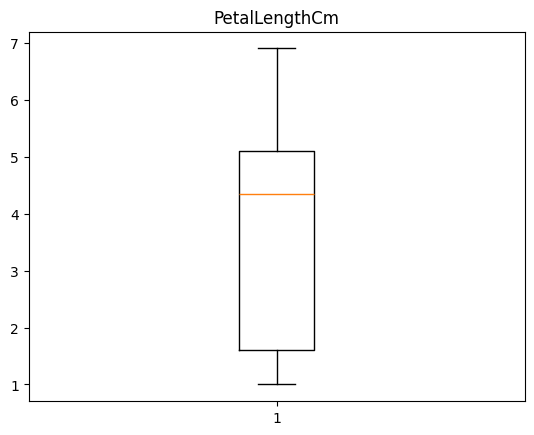

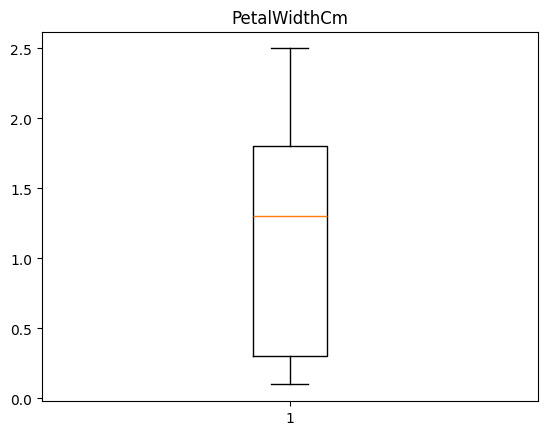

In [10]:
# Check for the outliers
for col in df_iris.columns :
    if df_iris[col].dtype != 'object' :
        plt.boxplot(df_iris[col])
        plt.title(col)
        plt.show()

### Inference
- Here, we see some outliers in 'SepalWidthCM' columns, but they aren't actual outliers. <br/>
- Because the majority of values lies between 2.2 to 4, so it's showing other limited values as outliers.

In [11]:
# Label Encoding
encoder = LabelEncoder()

for col in df_iris.columns :
    if df_iris[col].dtype == 'object' :
        df_iris[col] = encoder.fit_transform(df_iris[col])

df_iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Visualization

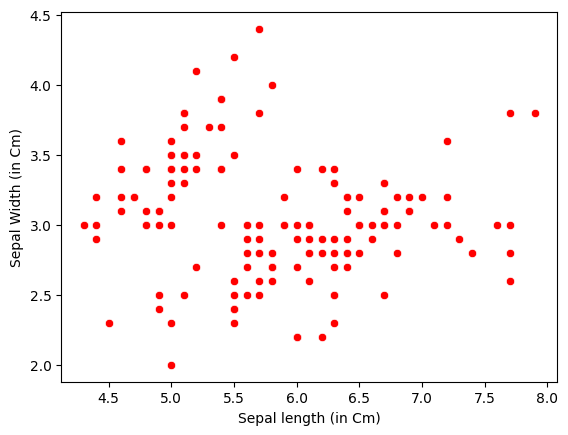

In [12]:
# Build a scatter plot for 'Sepal length' & 'Sepal width'
sns.scatterplot(x=df_iris['SepalLengthCm'], y=df_iris['SepalWidthCm'], color = 'red')
plt.xlabel('Sepal length (in Cm)', fontsize=10)
plt.ylabel('Sepal Width (in Cm)', fontsize=10)
plt.show()


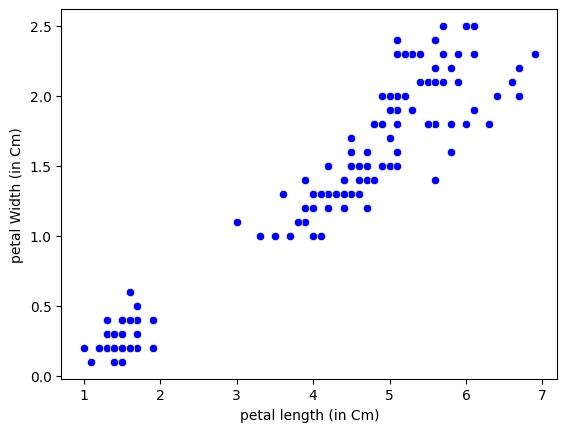

In [13]:
# Build a scatter plot for 'Petal length' & 'Petal width'
sns.scatterplot(x=df_iris['PetalLengthCm'], y=df_iris['PetalWidthCm'], color = 'blue')
plt.xlabel('petal length (in Cm)', fontsize=10)
plt.ylabel('petal Width (in Cm)', fontsize=10)
plt.show()

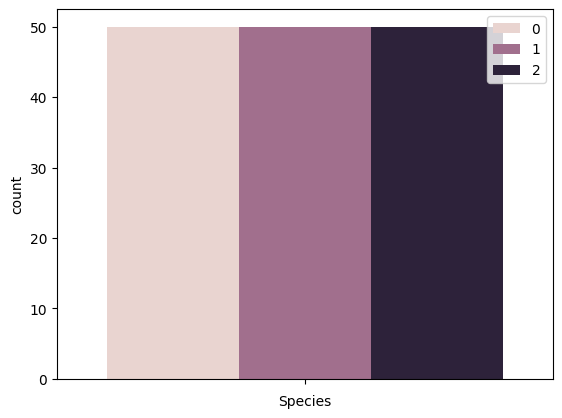

In [14]:
# Build a bar plot to visualize 'species' classification and their counts
sns.barplot(y=df_iris['Species'].value_counts(), hue=df_iris['Species'].unique())
plt.xlabel('Species')
plt.show()

### Inference
- Here, this proves that data is equally distibuted into species, so we don't need to take care of it.

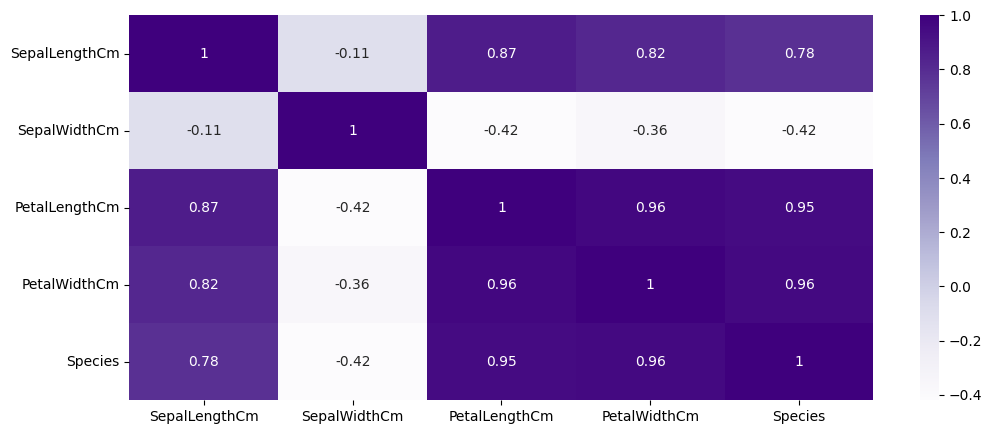

In [18]:
# Check the correlation of all columns with target variable
plt.figure(figsize=(12, 5))
sns.heatmap(df_iris.corr(), annot=True, cmap='Purples')
plt.show()

### Inference
- Here, as we see almost every independent columns are having descent correlation with target column.

# Feature Engineering 

In [19]:
# Initialize independent & dependent variables
X = pd.DataFrame(df_iris.drop(columns=['Species']))
y = pd.DataFrame(df_iris['Species'])

In [23]:
# Get the training & testing data from train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Check whether the shape of both train & test data are equal or not.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 1)
(30, 1)


In [26]:
# Initialize the model
model_lr = LogisticRegression()

In [30]:
# Train the model
model_lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Get the predicted y from the model & convert to dataframe
y_pred = model_lr.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['y_pred'])
y_pred.head()

,y_pred
0,1
1,0
2,2
3,1
4,1


In [33]:
# Edit the dataframe of actual y
y_test.rename(columns={'Species' : 'y_actual'})
y_test.reset_index(inplace=True)
y_test.drop(columns=['index'], inplace=True)
y_test.head()

,Species
0,1
1,0
2,2
3,1
4,1


In [45]:
# concatenate y_actual & y_predicted to analyze the difference (between both) manually.
pd.concat([y_pred, y_test], axis=1).head()

,y_pred,Species
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1


In [37]:
# Accuracy score of model
acc = accuracy_score(y_test, y_pred)
print("Accuracy :-", round(acc*100, 2))

Accuracy :- 100.0


In [44]:
cfm = confusion_matrix(y_test, y_pred)
print(cfm)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


### Inference 
- Here, we see that model's prediction is good. <br/>
- Also their isn't much pattern in training data, so its easy for model to predict.